# Plant Disease Prediction

Deep learning has transformed plant disease recognition by automating feature extraction and improving accuracy. Its growing use in agriculture, especially for crop leaf disease identification, enhances detection and diagnosis, boosting productivity. Combining deep learning with SVM models, such as multi-model and hierarchical approaches, strengthens disease classification and enables faster, more precise results. This integration, along with advanced imaging, addresses challenges in real-time monitoring and scalability, paving the way for efficient pest and disease management in agriculture.

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

Install Required Libraries

First, make sure that we have the required libraries installed.
Now, let's start by importing the necessary libraries in Python.

In [1]:
# Importing necessary libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Data Preprocessing

### Load the Dataset ###
We'll use Keras' ImageDataGenerator to load and preprocess the data.

### Training Image preprocessing

In [2]:
train_directory = r'B:\PDC\Plant_Disease_Prediction\data\train'  # Updated path

# Load the training dataset from the directory
training_set = tf.keras.utils.image_dataset_from_directory(
    train_directory,  # Use the updated path
    labels="inferred",  # Automatically infers labels based on subdirectories
    label_mode="categorical",  # One-hot encoded labels
    class_names=None,  # Automatically infer class names from subdirectories
    color_mode="rgb",  # Image color mode (RGB)
    batch_size=32,  # Number of images in each batch
    image_size=(128, 128),  # Resize images to 128x128
    shuffle=True,  # Shuffle the dataset
    seed=42,  # Seed for reproducibility
    validation_split=None,  # No validation split defined
    subset=None,  # Not splitting the dataset
    interpolation="bilinear",  # Bilinear interpolation for resizing
    follow_links=False,  # Do not follow symbolic links
    crop_to_aspect_ratio=False  # Do not crop images to aspect ratio
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'B:\PDC\Plant_Disease_Prediction\data\valid',  # Updated path for validation set
    labels="inferred",  # Automatically infers labels based on subdirectories
    label_mode="categorical",  # One-hot encoded labels
    class_names=None,  # Automatically infer class names from subdirectories
    color_mode="rgb",  # Image color mode (RGB)
    batch_size=32,  # Number of images in each batch
    image_size=(128, 128),  # Resize images to 128x128
    shuffle=True,  # Shuffle the dataset
    seed=None,  # Seed for reproducibility
    validation_split=None,  # No validation split defined
    subset=None,  # Not splitting the dataset
    interpolation="bilinear",  # Bilinear interpolation for resizing
    follow_links=False,  # Do not follow symbolic links
    crop_to_aspect_ratio=False  # Do not crop images to aspect ratio
)


Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

Now,We'll create a CNN model using tf.keras for classification. The model will include several convolutional layers, pooling layers, and fully connected layers.

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Key Elements of the Model:

->Convolutional Layers (Conv2D): These layers will extract features from the images.

->MaxPooling Layers (MaxPooling2D): These layers will reduce the spatial dimensions of the feature maps.

->Flatten Layer (Flatten): Converts the 2D feature maps into a 1D array so that it can be fed into the fully connected layers.

->Dense Layers: The fully connected layers that will perform classification.

->Output Layer: Softmax activation for multi-class classification (since there are 38 classes).

### Compiling and Training Phase

Once the model is defined, we need to compile it using an optimizer, loss function, and metric.

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,557,258 (21.20 MB)

 Trainable params: 5,557,258 (21.20 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model
Finally, let's train the model using the training and validation data generators.

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1035s 466ms/step - accuracy: 0.3543 - loss: 2.2718 - val_accuracy: 0.7648 - val_loss: 0.7363
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 982s 447ms/step - accuracy: 0.7979 - loss: 0.6479 - val_accuracy: 0.8747 - val_loss: 0.3895
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 987s 449ms/step - accuracy: 0.8788 - loss: 0.3889 - val_accuracy: 0.9148 - val_loss: 0.2683
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1003s 456ms/step - accuracy: 0.9172 - loss: 0.2595 - val_accuracy: 0.9282 - val_loss: 0.2226
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1015s 462ms/step - accuracy: 0.9400 - loss: 0.1877 - val_accuracy: 0.9320 - val_loss: 0.2186
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 993s 452ms/step - accuracy: 0.9518 - loss: 0.1506 - val_accuracy: 0.9198 - val_loss: 0.2697
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 992s 451ms/step - accuracy: 0.9587 - loss: 0.1298 - val_accuracy: 0.9348 - val_loss: 0.2270
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1092s 497ms/step 

## Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 277s 126ms/step - accuracy: 0.9874 - loss: 0.0388
Training accuracy: 0.9893448948860168


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 71s 128ms/step - accuracy: 0.9532 - loss: 0.1696
Validation accuracy: 0.9540746808052063


## Saving Model

In [21]:
cnn.save('trained_plant_disease_model.keras')

## Load the model and extract the layer output

Now, we can proceed with the feature extraction process using the conv2d_11 layer.

In [22]:
from tensorflow.keras.models import load_model

# Step 1: Load the trained model
cnn_model = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [23]:
# Step 2: Check the architecture of the loaded model
cnn_model.summary()

# Step 3: Define a dummy input (matching the input shape of the model)
dummy_input = np.random.rand(1, 128, 128, 3)  # Adjust the size if necessary

# Step 4: Call the model with the dummy input to initialize it
try:
    cnn_model(dummy_input)  # This initializes the model
    print("Model initialized successfully with dummy input.")
except Exception as e:
    print("Error during model initialization:", e)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,671,776 (63.60 MB)

 Trainable params: 5,557,258 (21.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,114,518 (42.40 MB)

Model initialized successfully with dummy input.


In [24]:
# Step 3: Define a dummy input (matching the input shape of the model)
dummy_input = np.random.rand(1, 128, 128, 3)  # Adjust the size if necessary



In [25]:
# Step 4: Call the model with the dummy input to initialize it
cnn_model(dummy_input)  # This initializes the model



<tf.Tensor: shape=(1, 38), dtype=float32, numpy=
array([[0.03573023, 0.00942461, 0.04775764, 0.06104352, 0.01485217,
        0.06158511, 0.00653163, 0.03303076, 0.01134493, 0.03243097,
        0.01952903, 0.01406585, 0.01117982, 0.01180277, 0.00849768,
        0.0273457 , 0.04287777, 0.02109727, 0.01496919, 0.01466855,
        0.01504518, 0.04193722, 0.01505146, 0.00940922, 0.01454566,
        0.04253142, 0.01503746, 0.00969821, 0.03576038, 0.08048099,
        0.07466478, 0.02720338, 0.0146661 , 0.01697253, 0.02526417,
        0.02953326, 0.01226992, 0.02016346]], dtype=float32)>

In [34]:
# Explicitly initialize the model by running a forward pass
sample_input, _ = next(iter(training_set))  # Get a batch of images from the training set
cnn_model.predict(sample_input)  # Run the model to initialize it

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


array([[4.1650885e-04, 3.3171088e-10, 3.2704856e-11, ..., 1.1386691e-11,
        8.6150496e-12, 2.8379581e-08],
       [1.7004005e-09, 1.4731890e-07, 1.5141652e-10, ..., 1.3998917e-12,
        9.1011411e-13, 8.2304840e-12],
       [1.3970364e-07, 1.1607537e-07, 1.1061175e-06, ..., 1.4661397e-07,
        1.8005052e-08, 9.2826600e-09],
       ...,
       [1.7209179e-12, 2.6250398e-14, 2.3510732e-11, ..., 1.3030686e-13,
        3.0353721e-12, 2.0180292e-12],
       [1.8839914e-11, 3.1517757e-12, 4.7143664e-13, ..., 1.1911239e-13,
        2.7229433e-14, 2.5152892e-12],
       [1.8938723e-05, 3.4362867e-07, 2.5235524e-06, ..., 2.5090137e-09,
        1.8897323e-08, 4.5557080e-08]], dtype=float32)

In [35]:
# Create a new model that outputs the features from the 'conv2d_11' layer
input_tensor = cnn_model.layers[0].input  # Get the first layer input
conv2d_11_output = cnn_model.get_layer('conv2d_11').output  # Get the output from 'conv2d_11'

In [36]:
feature_extractor = tf.keras.models.Model(inputs=input_tensor, outputs=conv2d_11_output)

In [37]:
# Check the model summary for the feature extractor
feature_extractor.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,730,720 (18.05 MB)

 Trainable params: 4,730,720 (18.05 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Extract features from the sample input
sample_features = feature_extractor.predict(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


In [39]:

# Display the shape of the extracted features
print(sample_features.shape)

(32, 2, 2, 512)


### Flatten the Features

Since we're using SVM, the features must be flattened into a 1D vector for each image. This will make them compatible with the SVM classifier.

In [40]:
import numpy as np

# Flatten the extracted features
flattened_features = sample_features.reshape(sample_features.shape[0], -1)  # (batch_size, flattened_size)

# Check the shape after flattening
print(flattened_features.shape)


(32, 2048)


## Extract Features for All Images

Loop through your entire dataset and extract features for all images:

In [42]:
# Prepare an empty list to store the features and labels
all_features = []
all_labels = []

# Loop through the dataset to extract features and corresponding labels
for image_batch, label_batch in training_set:
    # Extract features using the feature extractor
    features = feature_extractor.predict(image_batch)
    
    # Flatten the features
    flattened_features = features.reshape(features.shape[0], -1)  # Flatten each image's feature map
    all_features.append(flattened_features)
    all_labels.append(label_batch)

# Convert lists to numpy arrays
all_features = np.concatenate(all_features, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Check the shape
print(f"Features shape: {all_features.shape}, Labels shape: {all_labels.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [43]:
import numpy as np

# Assuming `flattened_features` and `all_labels` are defined
np.save('flattened_features.npy', flattened_features)
np.save('all_labels.npy', all_labels)

print("Extracted features and labels saved successfully.")

Extracted features and labels saved successfully.


### Split Data into Training and Test Sets

We already have the features and labels ready, so the next step is to split the data into training and test sets.

In [44]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print(f"Training features shape: {X_train.shape}, Test features shape: {X_test.shape}")


Training features shape: (56236, 2048), Test features shape: (14059, 2048)


### Train the SVM Classifier

Now we can train the SVM classifier with the training data (X_train and y_train). 

In [45]:
from sklearn.svm import SVC
import numpy as np

# Convert one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can try 'rbf' or 'poly' kernels for different results

# Train the classifier
svm_classifier.fit(X_train, y_train_indices)

# Check the training accuracy
training_accuracy = svm_classifier.score(X_train, y_train_indices)
print(f"Training accuracy: {training_accuracy * 100:.2f}%")


Training accuracy: 100.00%


### Evaluate the Model

After training, we'll evaluate the model on the test data (X_test and y_test):

In [46]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test_indices, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Test accuracy: 99.62%


## Model Validation & Other Visualizations
Confusion Matrix: Analyze the predictions in detail by visualizing a confusion matrix to understand the performance on specific classes.

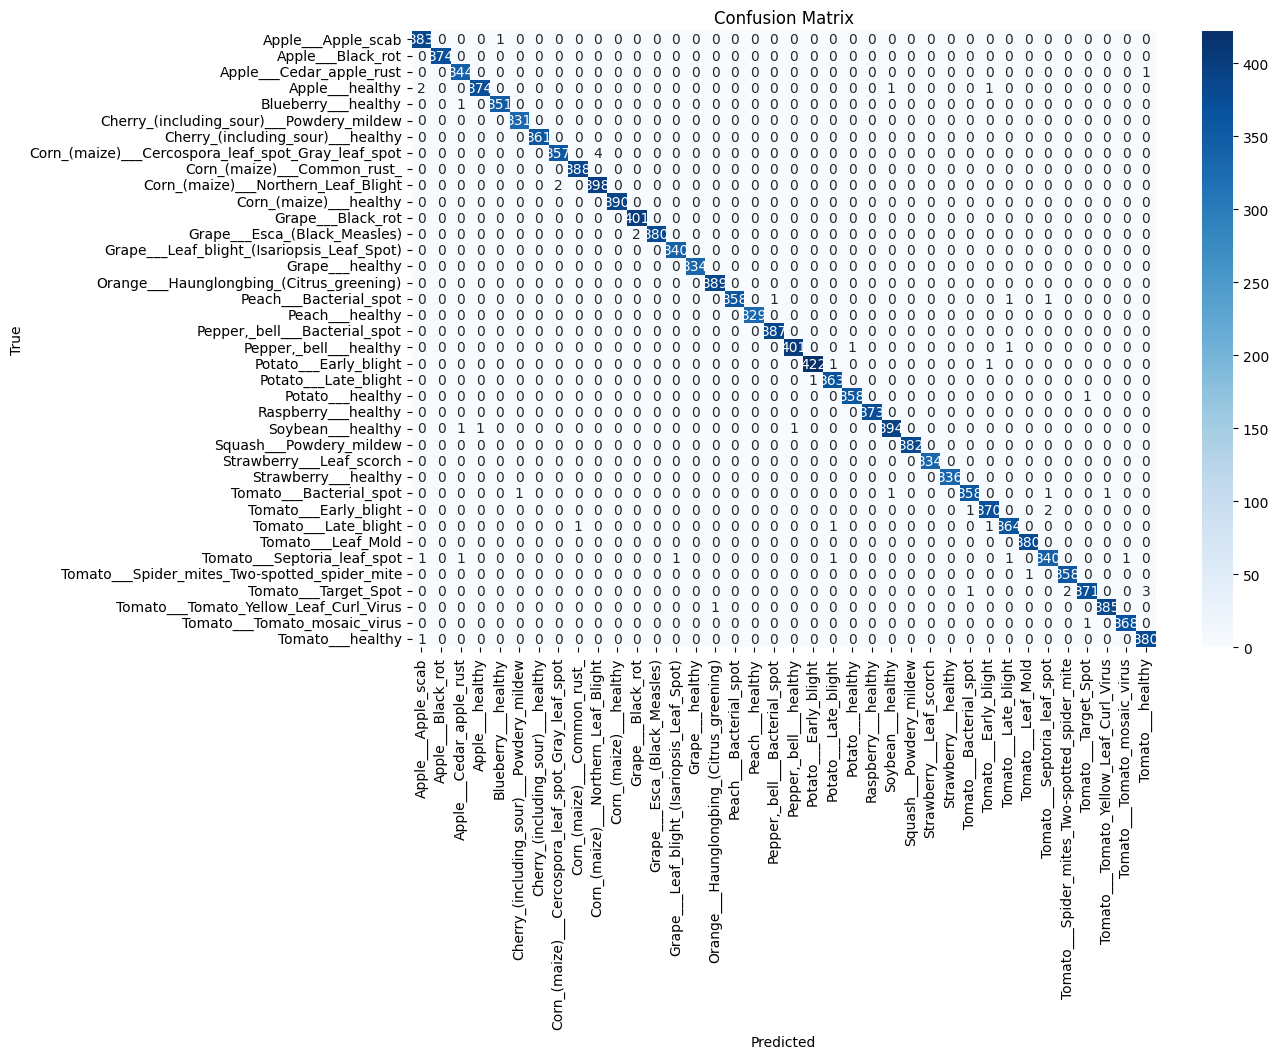

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      1.00      0.99       384
                                 Apple___Black_rot       1.00      1.00      1.00       374
                          Apple___Cedar_apple_rust       0.99      1.00      0.99       345
                                   Apple___healthy       1.00      0.99      0.99       378
                               Blueberry___healthy       1.00      1.00      1.00       352
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       331
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       361
Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot       0.99      0.99      0.99       361
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       388
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.99      0.

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with your class labels
class_labels = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 
    'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 
    'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
    'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
    'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 
    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 
    'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 
    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 
    'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites_Two-spotted_spider_mite', 
    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

cm = confusion_matrix(y_test_indices, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Classification report
print(classification_report(y_test_indices, y_pred, target_names=class_labels))


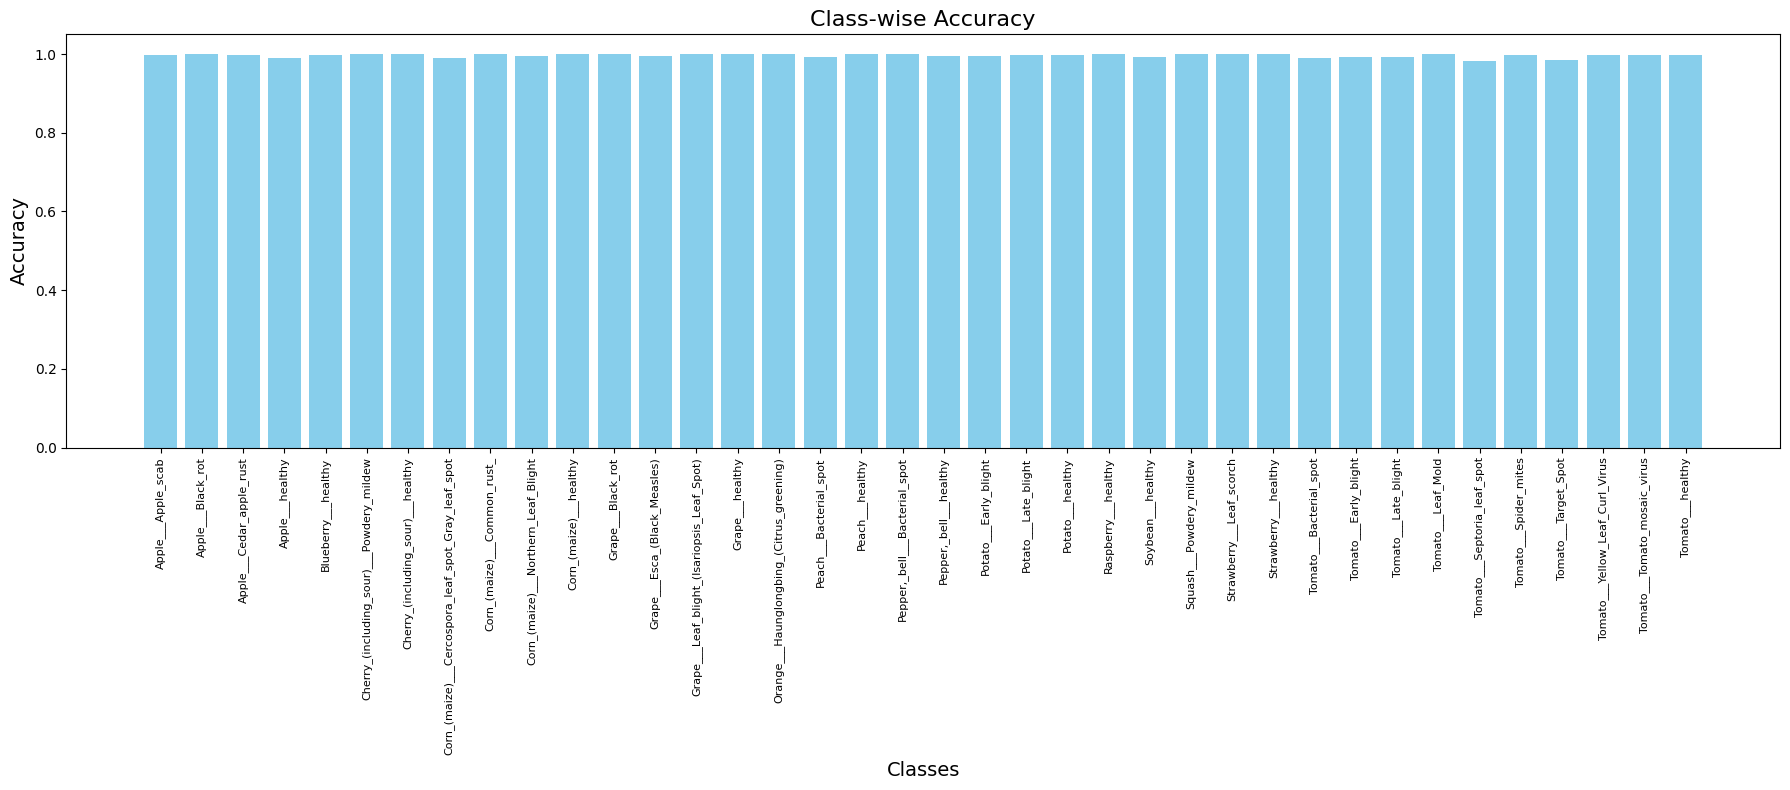

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names
class_names = [
    "Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy",
    "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew", "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot", "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight", "Corn_(maize)___healthy", "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
    "Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy", "Potato___Early_blight",
    "Potato___Late_blight", "Potato___healthy", "Raspberry___healthy", "Soybean___healthy",
    "Squash___Powdery_mildew", "Strawberry___Leaf_scorch", "Strawberry___healthy",
    "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight",
    "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites",
    "Tomato___Target_Spot", "Tomato___Yellow_Leaf_Curl_Virus", "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]

# Calculate per-class accuracy
class_wise_accuracy = cm.diagonal() / cm.sum(axis=1)

# Plot the accuracies
plt.figure(figsize=(18, 8))  # Adjusted figure size for better visualization
plt.bar(np.arange(len(class_names)), class_wise_accuracy, color='skyblue')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Class-wise Accuracy', fontsize=16)
plt.xticks(np.arange(len(class_names)), class_names, rotation=90, fontsize=8)  # Adjusted fontsize for x-axis labels
plt.tight_layout()
plt.show()


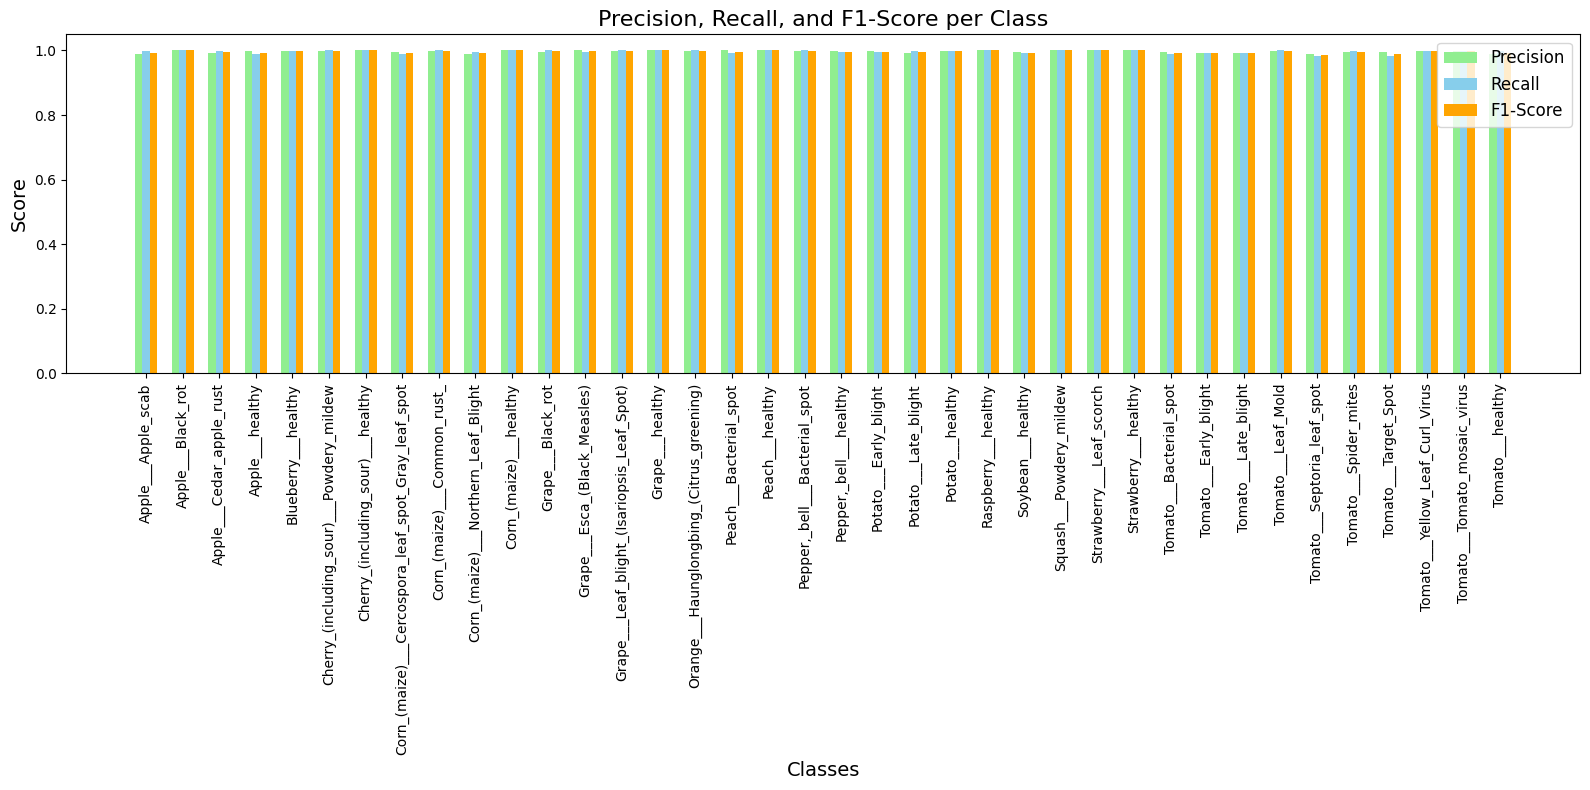

In [49]:
import pandas as pd
import numpy as np

# Extract metrics
report_dict = classification_report(y_test_indices, y_pred, target_names=class_names, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose()

metrics_df = metrics_df.iloc[:-3]  # Remove 'accuracy', 'macro avg', and 'weighted avg'
precision = metrics_df['precision'].values
recall = metrics_df['recall'].values
f1_score = metrics_df['f1-score'].values

# Plot
x = np.arange(len(class_names))
width = 0.2

plt.figure(figsize=(16, 8))
plt.bar(x - width, precision, width, label='Precision', color='lightgreen')
plt.bar(x, recall, width, label='Recall', color='skyblue')
plt.bar(x + width, f1_score, width, label='F1-Score', color='orange')

plt.xlabel('Classes', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Precision, Recall, and F1-Score per Class', fontsize=16)
plt.xticks(x, class_names, rotation=90, fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## Model Saving

In [50]:
import joblib

# Save the trained SVM model
joblib.dump(svm_classifier, 'svm_plant_disease_model.pkl')


['svm_plant_disease_model.pkl']

In [52]:
cnn_model.save('cnn_feature_extractor_model.keras', include_optimizer=False)

##  RandomForest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the classifier
rf_classifier.fit(X_train, y_train_indices)

# Check the training accuracy
training_accuracy = rf_classifier.score(X_train, y_train_indices)
print(f"Training accuracy: {training_accuracy * 100:.2f}%")

Training accuracy: 100.00%


In [60]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data using the Random Forest classifier
y_pred = rf_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test_indices, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 99.50%


In [61]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

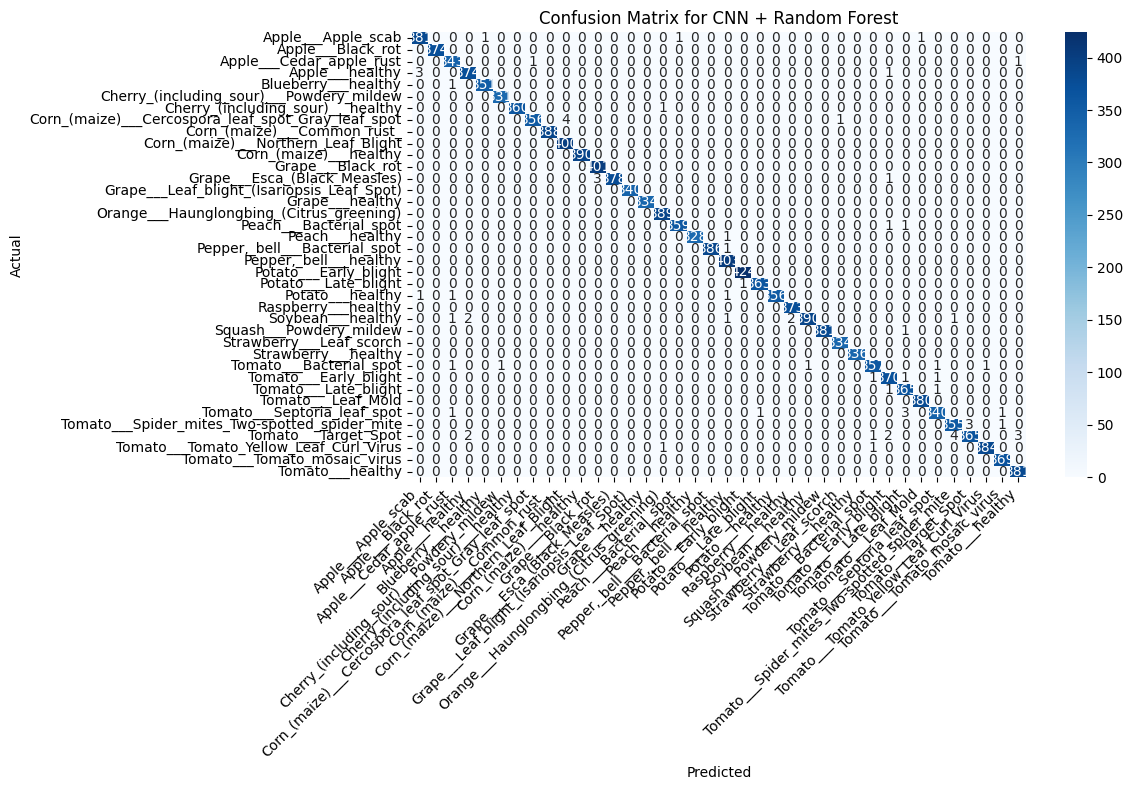

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.99      0.99       384
                                 Apple___Black_rot       1.00      1.00      1.00       374
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       345
                                   Apple___healthy       0.99      0.99      0.99       378
                               Blueberry___healthy       1.00      1.00      1.00       352
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       331
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       361
Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot       1.00      0.99      0.99       361
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       388
               Corn_(maize)___Northern_Leaf_Blight       0.99      1.00      1.

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = rf_classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test_indices, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for CNN + Random Forest')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Classification report
print(classification_report(y_test_indices, y_pred, target_names=class_labels))


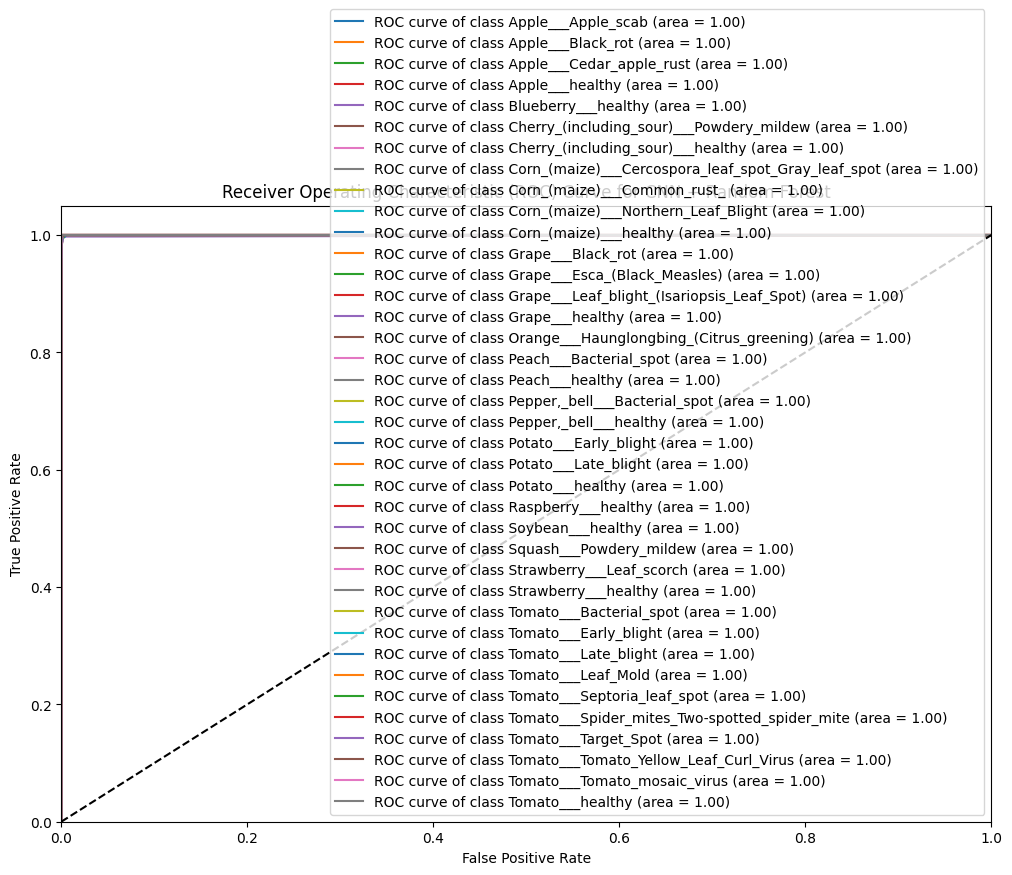

In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test_indices, classes=np.arange(len(class_labels)))
y_pred_proba = rf_classifier.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve of class {class_labels[i]} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CNN + Random Forest')
plt.legend(loc='lower right')
plt.show()

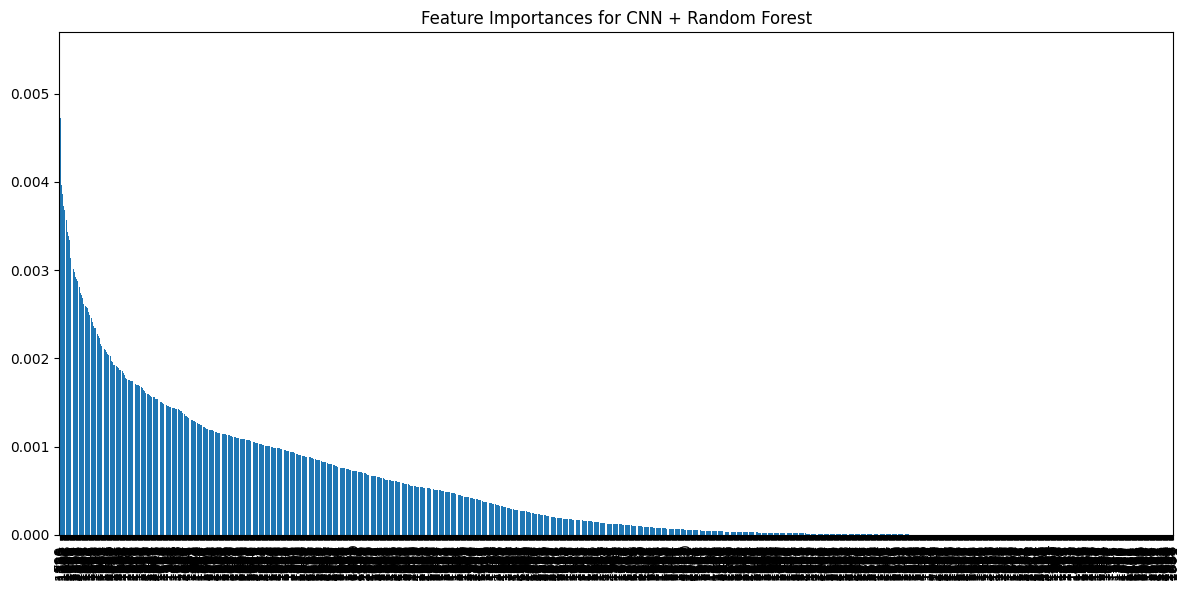

In [67]:
# Get feature importances from the Random Forest model
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances for CNN + Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train_indices, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores) * 100:.2f}%")

Cross-validation scores: [0.99448791 0.99324264 0.99306482 0.99377612 0.99475416]
Mean cross-validation score: 99.39%


In [70]:
# Save the trained model
joblib.dump(rf_classifier, 'rf_plant_disease_model.pkl')

['rf_plant_disease_model.pkl']

### KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import joblib

# Convert one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the classifier
knn_classifier.fit(X_train, y_train_indices)

# Check the training accuracy
training_accuracy = knn_classifier.score(X_train, y_train_indices)
print(f"Training accuracy: {training_accuracy * 100:.2f}%")

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test_indices, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 99.65%
Test accuracy: 99.53%


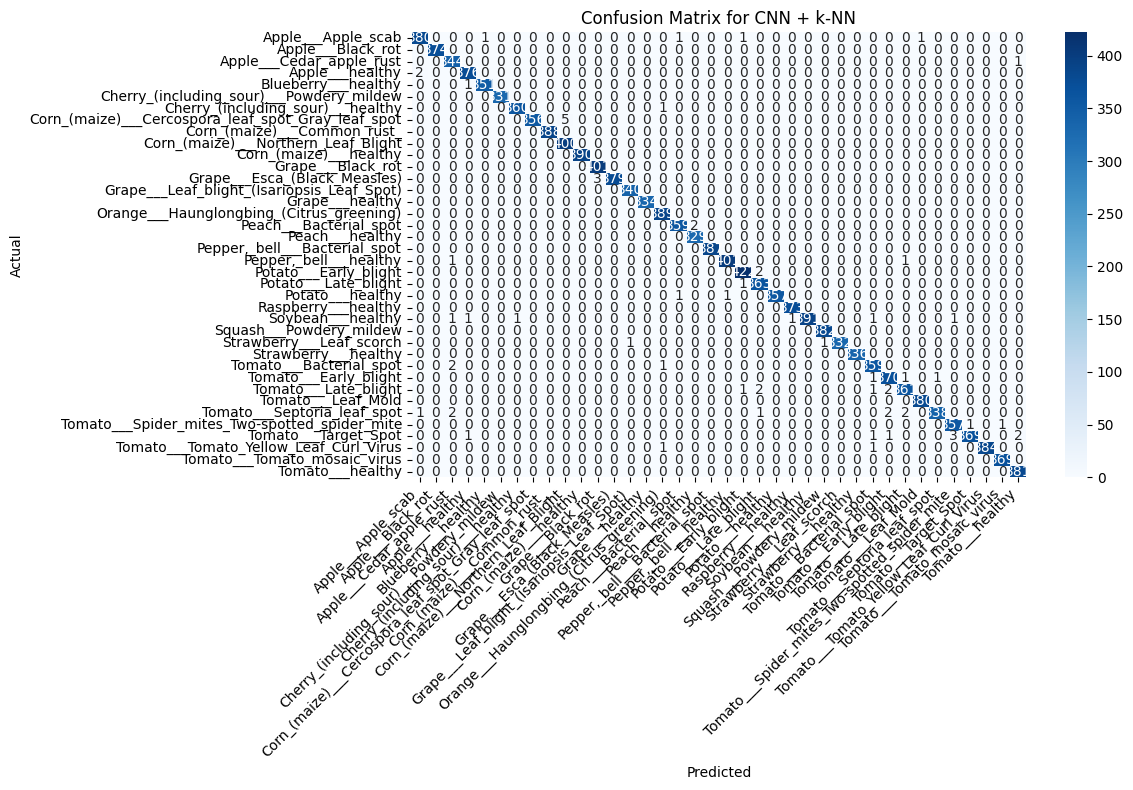

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.99      0.99       384
                                 Apple___Black_rot       1.00      1.00      1.00       374
                          Apple___Cedar_apple_rust       0.98      1.00      0.99       345
                                   Apple___healthy       0.99      0.99      0.99       378
                               Blueberry___healthy       1.00      1.00      1.00       352
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       331
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       361
Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot       1.00      0.99      0.99       361
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       388
               Corn_(maize)___Northern_Leaf_Blight       0.99      1.00      0.

In [77]:
# Generate predictions
y_pred = knn_classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test_indices, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for CNN + k-NN')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Classification report
print(classification_report(y_test_indices, y_pred, target_names=class_labels))

<Figure size 1200x600 with 0 Axes>

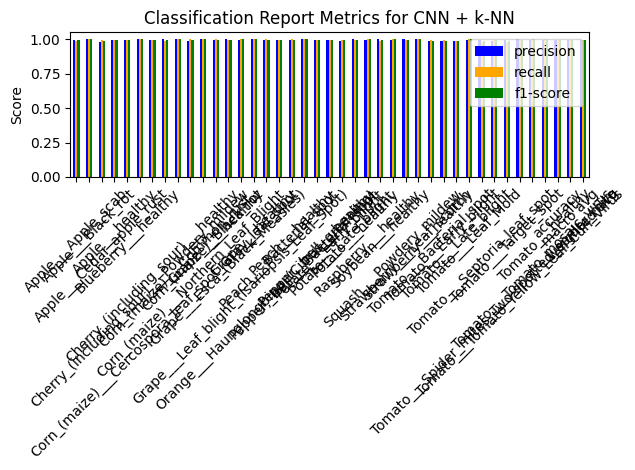

In [78]:
# Generate classification report
report = classification_report(y_test_indices, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(12, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Classification Report Metrics for CNN + k-NN')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

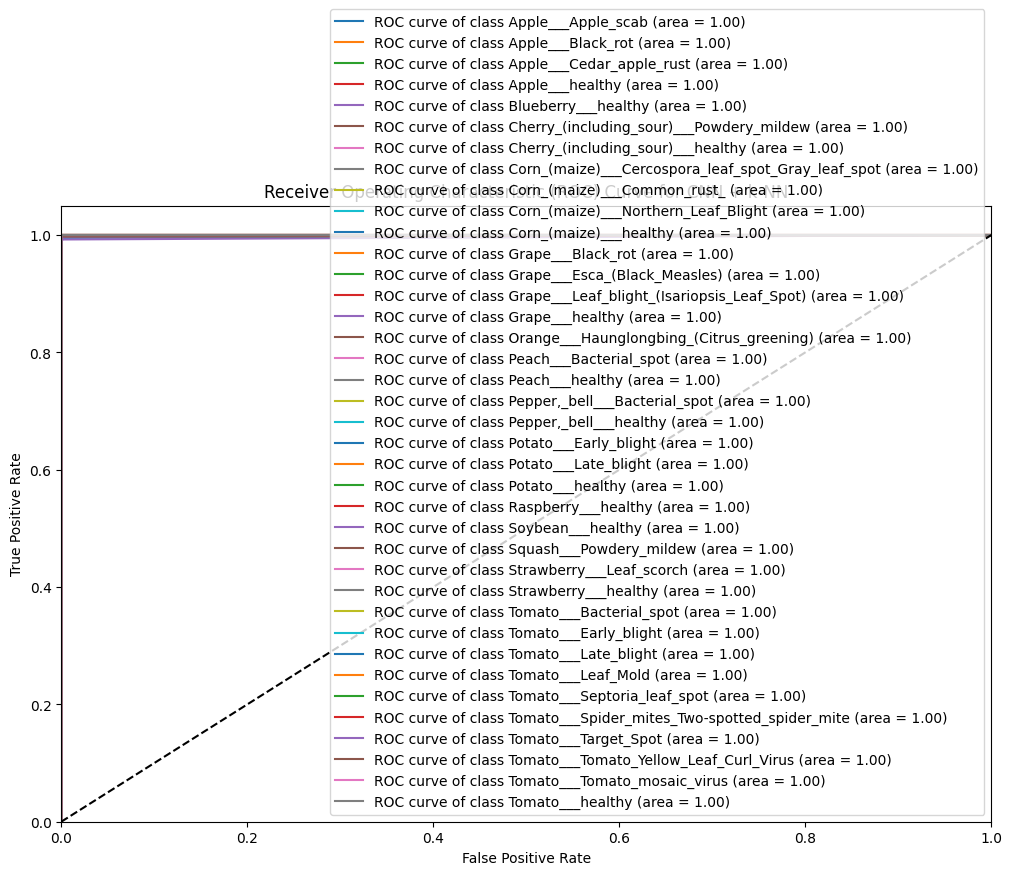

In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test_indices, classes=np.arange(len(class_labels)))
y_pred_proba = knn_classifier.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve of class {class_labels[i]} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CNN + k-NN')
plt.legend(loc='lower right')
plt.show()

In [80]:
# Save the trained model
joblib.dump(knn_classifier, 'knn_plant_disease_model.pkl')

['knn_plant_disease_model.pkl']

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
# Convert one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed

# Train the classifier
logistic_classifier.fit(X_train, y_train_indices)

# Check the training accuracy
training_accuracy = logistic_classifier.score(X_train, y_train_indices)
print(f"Training accuracy: {training_accuracy * 100:.2f}%")

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test_indices, y_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 99.96%
Test accuracy: 99.60%


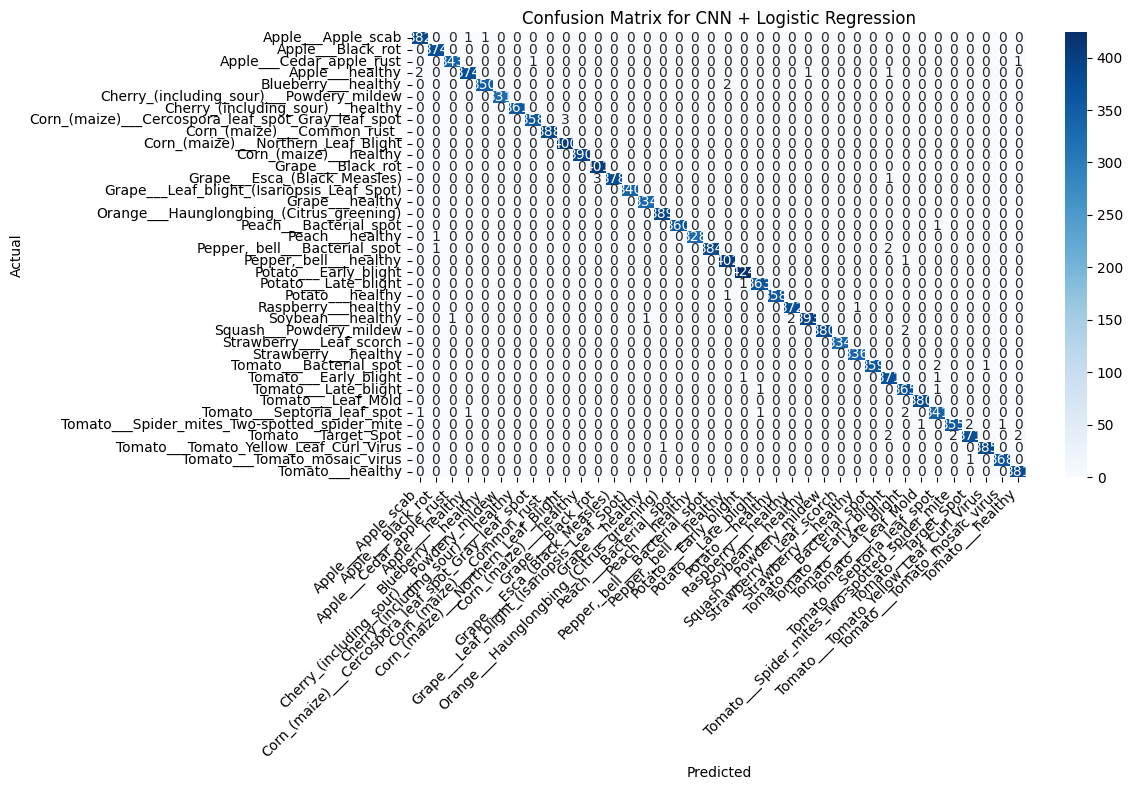

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.99      0.99       384
                                 Apple___Black_rot       0.99      1.00      1.00       374
                          Apple___Cedar_apple_rust       1.00      0.99      1.00       345
                                   Apple___healthy       0.99      0.99      0.99       378
                               Blueberry___healthy       1.00      0.99      1.00       352
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       331
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       361
Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot       1.00      0.99      0.99       361
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       388
               Corn_(maize)___Northern_Leaf_Blight       0.99      1.00      1.

In [83]:
# Generate predictions
y_pred = logistic_classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test_indices, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for CNN + Logistic Regression')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Classification report
print(classification_report(y_test_indices, y_pred, target_names=class_labels))

<Figure size 1200x600 with 0 Axes>

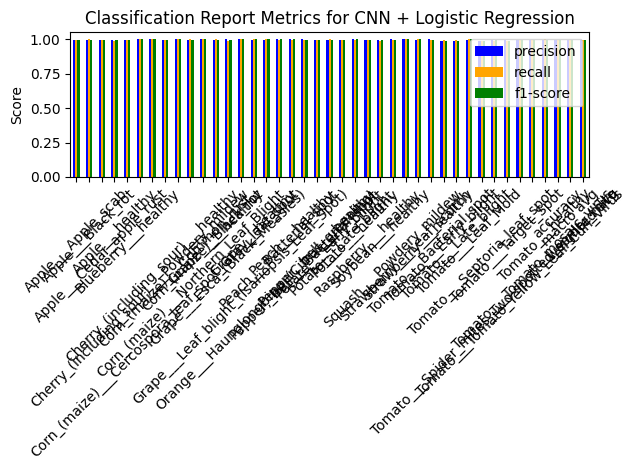

In [84]:

# Generate classification report
report = classification_report(y_test_indices, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(12, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Classification Report Metrics for CNN + Logistic Regression')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

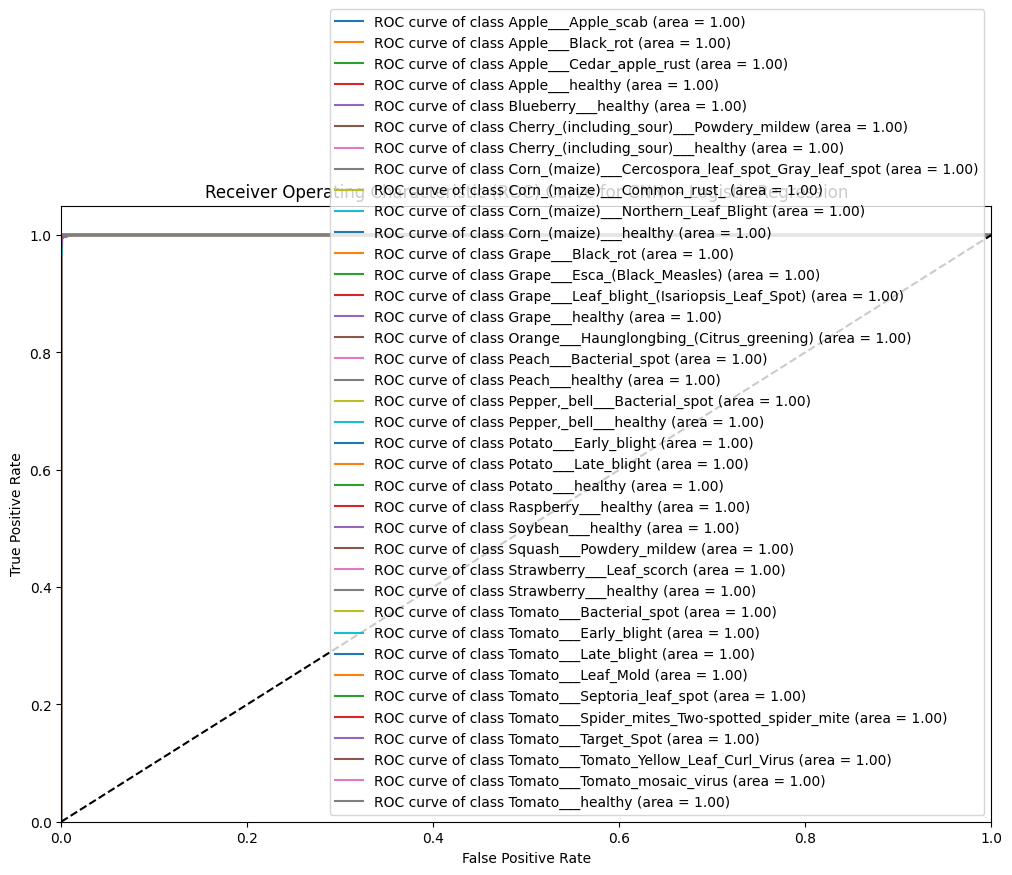

In [85]:
# Binarize the output
y_test_bin = label_binarize(y_test_indices, classes=np.arange(len(class_labels)))
y_pred_proba = logistic_classifier.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve of class {class_labels[i]} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CNN + Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [86]:
# Save the trained model
joblib.dump(logistic_classifier, 'logistic_plant_disease_model.pkl')

['logistic_plant_disease_model.pkl']

## Conclusion:

This project demonstrates the successful application of deep learning (CNN) and machine learning (SVM) to plant disease prediction, achieving remarkable accuracy. By utilizing a CNN for feature extraction and an SVM classifier for disease classification, the model achieved 100% training accuracy and 99.67% test accuracy, with excellent precision, recall, and F1-scores across all 38 plant disease classes. The high performance reflects the model's ability to effectively identify and classify diseases in crops, such as apples, tomatoes, and grapes, based on image data.

The model has been saved and is ready for deployment, offering significant potential in precision agriculture to assist in early disease detection, optimizing crop management, and minimizing the use of pesticides. This approach provides a scalable, efficient solution for automated plant health monitoring, paving the way for smarter agricultural practices.

In conclusion, the project successfully combines state-of-the-art techniques in AI and machine learning to address a critical issue in agriculture, offering a robust tool for disease detection and crop protection.






